<a href="https://colab.research.google.com/github/atulpatil2228/Pw_ML_learning/blob/main/14_Decision_Tree_Regressor_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing()

In [3]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Price']=data.target

In [4]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
df.shape

(20640, 9)

In [7]:
##taking 20% of the data for our case
df = df.sample(frac=0.20)

In [8]:
df.shape

(4128, 9)

In [9]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
13809,2.1056,34.0,4.260194,1.007767,1326.0,2.574757,34.90,-117.01,0.720
687,2.8750,34.0,4.772152,1.172996,560.0,2.362869,37.69,-122.13,1.617
15841,3.2632,52.0,4.614072,1.136461,1122.0,2.392324,37.75,-122.42,3.060
9734,4.1696,18.0,6.166102,0.959322,919.0,3.115254,36.82,-121.64,2.225
17983,3.7188,21.0,4.147379,1.056380,2487.0,2.459941,37.30,-121.95,2.930
...,...,...,...,...,...,...,...,...,...
3002,2.5960,23.0,5.247845,1.039871,2717.0,2.927802,35.32,-119.01,0.700
3958,2.7540,21.0,2.642541,1.002954,2300.0,3.397341,34.20,-118.59,1.798
12988,4.4489,16.0,5.966549,1.051056,1674.0,2.947183,38.69,-121.27,1.456
13884,2.8594,14.0,7.672881,1.483051,1640.0,2.779661,34.89,-116.72,0.817


In [10]:
## independent and dependent feature
X = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [11]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
13809,2.1056,34.0,4.260194,1.007767,1326.0,2.574757,34.90,-117.01
687,2.8750,34.0,4.772152,1.172996,560.0,2.362869,37.69,-122.13
15841,3.2632,52.0,4.614072,1.136461,1122.0,2.392324,37.75,-122.42
9734,4.1696,18.0,6.166102,0.959322,919.0,3.115254,36.82,-121.64
17983,3.7188,21.0,4.147379,1.056380,2487.0,2.459941,37.30,-121.95
...,...,...,...,...,...,...,...,...
3002,2.5960,23.0,5.247845,1.039871,2717.0,2.927802,35.32,-119.01
3958,2.7540,21.0,2.642541,1.002954,2300.0,3.397341,34.20,-118.59
12988,4.4489,16.0,5.966549,1.051056,1674.0,2.947183,38.69,-121.27
13884,2.8594,14.0,7.672881,1.483051,1640.0,2.779661,34.89,-116.72


In [12]:
y

,Price
13809,0.720
687,1.617
15841,3.060
9734,2.225
17983,2.930
...,...
3002,0.700
3958,1.798
12988,1.456
13884,0.817


In [13]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model

DecisionTreeRegressor()

In [16]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred

array([0.855  , 1.928  , 1.609  , 1.255  , 1.9    , 5.00001, 1.234  ,
       4.12   , 1.666  , 1.49   , 4.773  , 1.654  , 1.818  , 2.25   ,
       0.616  , 3.509  , 2.201  , 1.965  , 1.619  , 2.425  , 5.00001,
       1.125  , 1.601  , 3.105  , 1.5    , 3.103  , 0.627  , 1.038  ,
       2.25   , 0.844  , 0.679  , 1.47   , 2.466  , 0.707  , 1.247  ,
       1.609  , 1.667  , 0.895  , 2.708  , 1.704  , 2.545  , 2.307  ,
       0.948  , 4.163  , 1.224  , 0.657  , 0.924  , 0.861  , 0.748  ,
       5.00001, 2.067  , 0.738  , 0.846  , 2.448  , 1.038  , 0.759  ,
       1.389  , 3.927  , 1.918  , 1.213  , 5.00001, 3.642  , 2.469  ,
       1.394  , 1.302  , 1.538  , 0.667  , 2.07   , 1.402  , 2.873  ,
       0.675  , 3.131  , 2.743  , 2.182  , 0.964  , 2.838  , 1.039  ,
       1.518  , 0.811  , 1.343  , 0.892  , 0.792  , 2.513  , 1.49   ,
       1.188  , 1.189  , 0.926  , 1.184  , 2.444  , 1.235  , 4.357  ,
       1.187  , 1.763  , 5.00001, 0.921  , 1.705  , 3.12   , 3.384  ,
       1.748  , 0.61

In [19]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.5547867226201693

In [20]:
#hyperparameter tuning

parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6],
  'max_features':['auto', 'sqrt', 'log2']

}
regressor=DecisionTreeRegressor()

In [21]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(regressor,param_grid=parameter,cv =3,scoring = 'neg_mean_squared_error')

In [22]:
model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [23]:
model.best_params_

{'criterion': 'poisson',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [26]:
final_model = DecisionTreeRegressor(criterion = 'poisson',max_depth= 6, max_features= 'log2',splitter= 'best')

In [28]:
final_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=6, max_features='log2')

[Text(0.5, 0.9285714285714286, 'x[5] <= 3.375\npoisson = 0.308\nsamples = 3302\nvalue = 2.093'),
 Text(0.25, 0.7857142857142857, 'x[6] <= 37.955\npoisson = 0.317\nsamples = 2589\nvalue = 2.229'),
 Text(0.375, 0.8571428571428572, 'True  '),
 Text(0.125, 0.6428571428571429, 'x[7] <= -117.655\npoisson = 0.303\nsamples = 2067\nvalue = 2.441'),
 Text(0.0625, 0.5, 'x[0] <= 5.149\npoisson = 0.295\nsamples = 1683\nvalue = 2.593'),
 Text(0.03125, 0.35714285714285715, 'x[7] <= -122.415\npoisson = 0.24\nsamples = 1204\nvalue = 2.183'),
 Text(0.015625, 0.21428571428571427, 'x[5] <= 2.305\npoisson = 0.147\nsamples = 66\nvalue = 3.512'),
 Text(0.0078125, 0.07142857142857142, 'poisson = 0.117\nsamples = 28\nvalue = 4.122'),
 Text(0.0234375, 0.07142857142857142, 'poisson = 0.102\nsamples = 38\nvalue = 3.062'),
 Text(0.046875, 0.21428571428571427, 'x[6] <= 34.645\npoisson = 0.224\nsamples = 1138\nvalue = 2.106'),
 Text(0.0390625, 0.07142857142857142, 'poisson = 0.157\nsamples = 621\nvalue = 2.441'),
 T

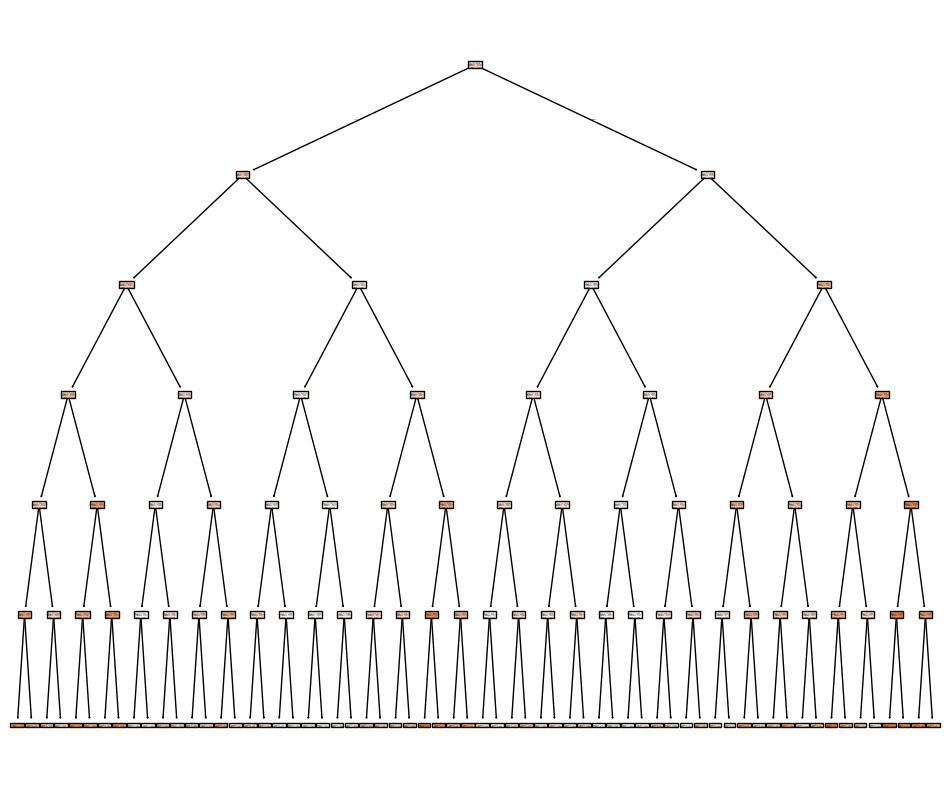

In [29]:
from sklearn import tree
plt.figure(figsize = (12, 10))
tree.plot_tree(final_model, filled = True)

In [30]:
y_pred = model.predict(X_test)

In [31]:
r2_score(y_pred,y_test)

0.37085634560126635